<a href="https://colab.research.google.com/github/Tea-Yeon-Kim/AI-Class/blob/main/week5/week5_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

import requests

url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/diabetes.csv"
response = requests.get(url)

with open('diabetes.csv', 'wb') as file:
    file.write(response.content)

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

df = pd.read_csv(url)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [41]:
# 컬렴명 확인
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# 1 - 1. 당뇨병데이터 분류

Text(0.5, 1.0, 'Outcome')

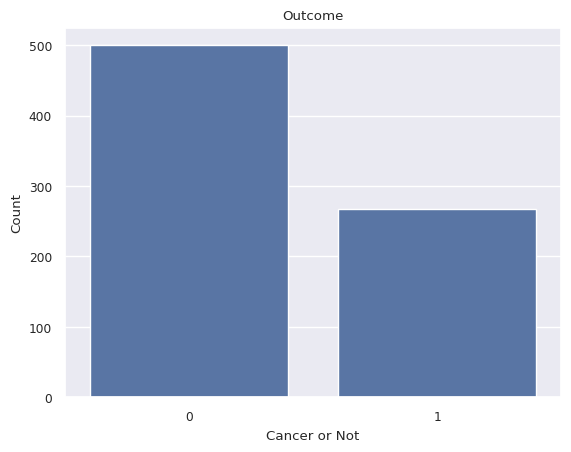

In [42]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Outcome")
plt.xlabel("Cancer or Not")
plt.ylabel("Count")
plt.title("Outcome")

In [43]:
# 결측치 확인
missing_values = df.isnull().sum()

print("\n결측치 개수:")
print(missing_values)


결측치 개수:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [44]:
# 레이블 갯수 확인 (숫자)
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [45]:
# 결측치 제거
df = df.dropna()

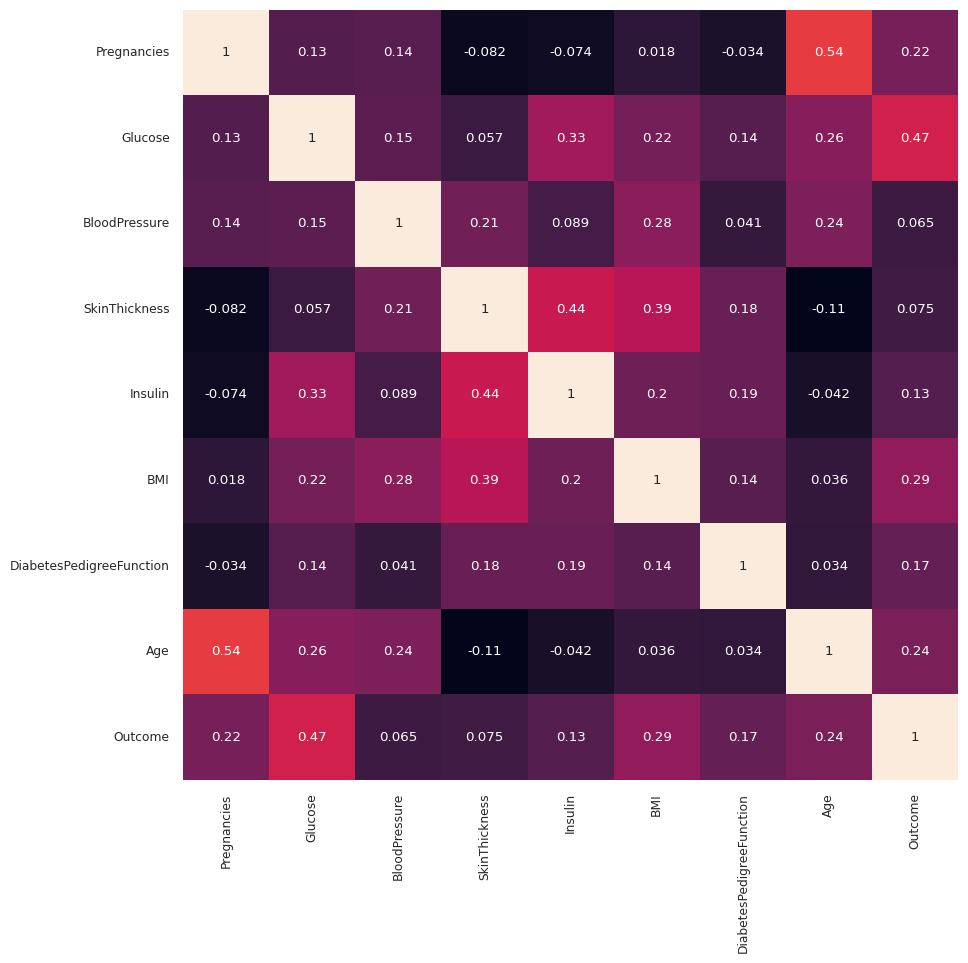

In [46]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# BMI와 높은 건 SkinThickness

In [47]:
X=df.drop('Outcome',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [48]:
y=df['Outcome']
y.value_counts()

,count
Outcome,
0,500
1,268


In [49]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [50]:
Y = pd.get_dummies(y).values
X = X.values

In [51]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [52]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [53]:
Y

array([[False,  True],
       [ True, False],
       [False,  True],
       ...,
       [ True, False],
       [False,  True],
       [ True, False]])

In [54]:
# 데이터 정규화 (평균 0, 표준편차 1로 변환)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X, Y,test_size=0.2,random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614, 2), (154, 2))

In [56]:

#Defining the model

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(20,input_shape=(8,),activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

model.compile(Adam(learning_rate=0.04),'binary_crossentropy',metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 20)                  │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 2)                   │              42 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,062 (4.15 KB)

 Trainable params: 1,062 (4.15 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_split=0.1)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6251 - loss: 0.6182 - val_accuracy: 0.8226 - val_loss: 0.4884
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7550 - loss: 0.4917 - val_accuracy: 0.7742 - val_loss: 0.5002
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7910 - loss: 0.4420 - val_accuracy: 0.8065 - val_loss: 0.5049
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7823 - loss: 0.4521 - val_accuracy: 0.7742 - val_loss: 0.5506
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7682 - loss: 0.4304 - val_accuracy: 0.7258 - val_loss: 0.6210
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7957 - loss: 0.4317 - val_accuracy: 0.8065 - val_loss: 0.5758
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7731 - loss: 0.4472 - val_accuracy: 0.7903 - val_loss: 0.7044
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7746 - loss: 0.4543 - val_accuracy: 0.7903 - val_loss

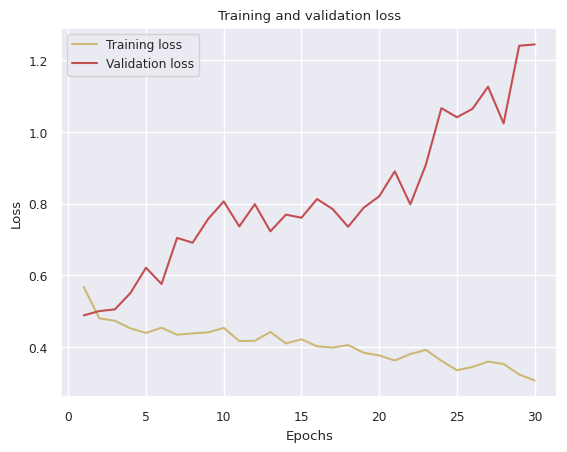

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

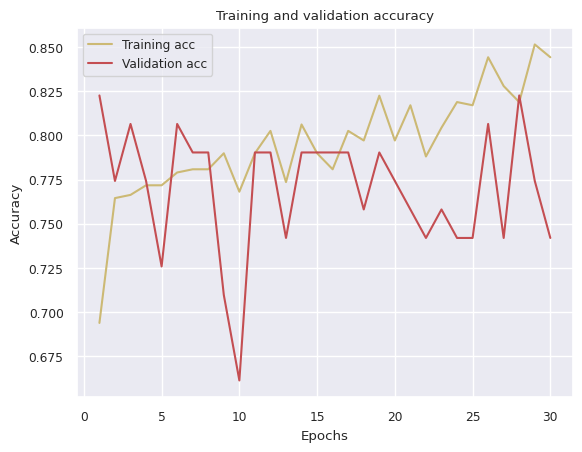

In [59]:

acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [60]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       107
           1       0.57      0.45      0.50        47

    accuracy                           0.73       154
   macro avg       0.67      0.65      0.66       154
weighted avg       0.71      0.73      0.72       154

[[91 16]
 [26 21]]


In [61]:
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7515 - loss: 0.8529


[0.8051589131355286, 0.7272727489471436]

# 1-2 당뇨병데이터 회귀

Text(0.5, 1.0, 'BMI')

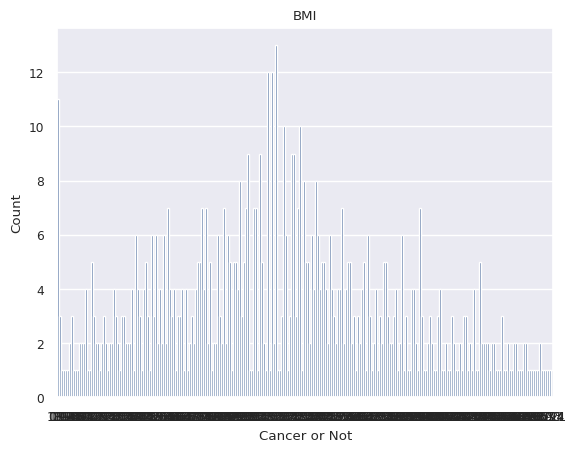

In [62]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="BMI")
plt.xlabel("Cancer or Not")
plt.ylabel("Count")
plt.title("BMI")

In [63]:
# 레이블 갯수 확인 (숫자)
df['BMI'].value_counts()

,count
BMI,
32.0,13
31.6,12
31.2,12
0.0,11
32.4,10
...,...
49.6,1
24.1,1
41.2,1


In [64]:
df_Regressor = df.drop('Outcome', axis=1)

In [65]:
# 결측치 확인
missing_values = df_Regressor.isnull().sum()

print("\n결측치 개수:")
print(missing_values)


결측치 개수:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


In [66]:
# 결측치 제거
df_Regressor = df_Regressor.dropna()

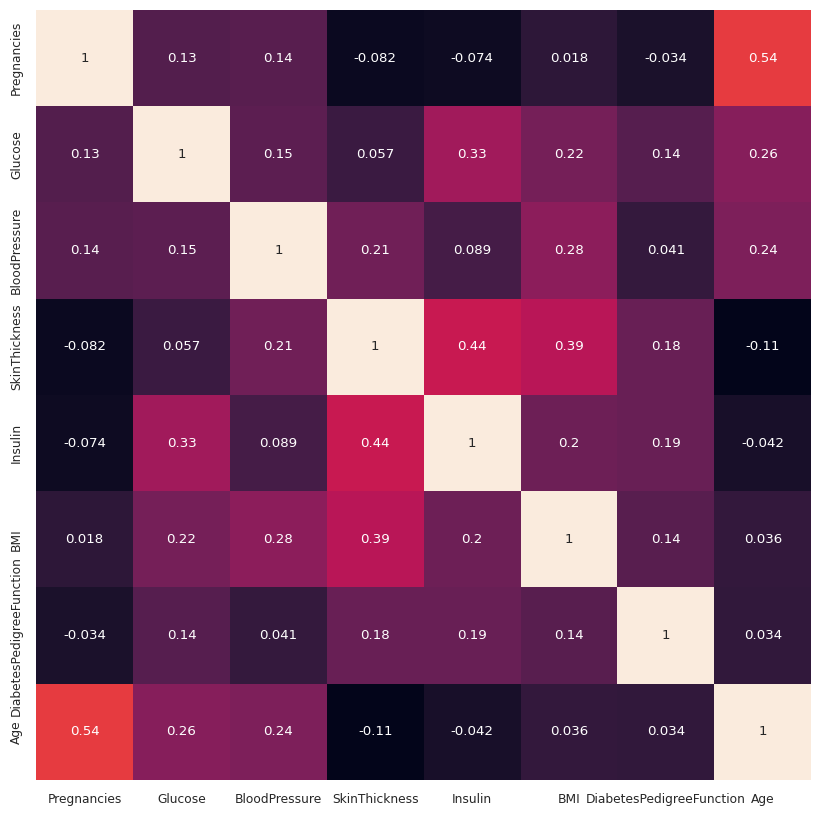

In [67]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df_Regressor.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# BMI와 높은 건 SkinThickness

In [68]:
X=df_Regressor.drop('BMI',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,0.627,50
1,1,85,66,29,0,0.351,31
2,8,183,64,0,0,0.672,32
3,1,89,66,23,94,0.167,21
4,0,137,40,35,168,2.288,33


In [69]:
y=df_Regressor['BMI']
y.value_counts()

,count
BMI,
32.0,13
31.6,12
31.2,12
0.0,11
32.4,10
...,...
49.6,1
24.1,1
41.2,1


In [70]:
y.head()

,BMI
0,33.6
1,26.6
2,23.3
3,28.1
4,43.1


In [71]:
Y = pd.get_dummies(y).values

In [72]:
X = X.values

In [73]:
X

array([[  6.   , 148.   ,  72.   , ...,   0.   ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.   ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,   0.   ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ..., 112.   ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,   0.   ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.   ,   0.315,  23.   ]])

In [74]:
y

,BMI
0,33.6
1,26.6
2,23.3
3,28.1
4,43.1
...,...
763,32.9
764,36.8
765,26.2
766,30.1


In [75]:
Y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [76]:
# 데이터 정규화 (평균 0, 표준편차 1로 변환)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X, Y,test_size=0.2,random_state=0)

In [78]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 7), (154, 7), (614, 248), (154, 248))

In [79]:

#Defining the model

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(20,input_shape=(7,),activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.01),loss='mse',metrics=['mae'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 20)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,021 (3.99 KB)

 Trainable params: 1,021 (3.99 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_split=0.1)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0117 - mae: 0.0680 - val_loss: 0.0047 - val_mae: 0.0230
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mae: 0.0297 - val_loss: 0.0044 - val_mae: 0.0172
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mae: 0.0150 - val_loss: 0.0041 - val_mae: 0.0137
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mae: 0.0128 - val_loss: 0.0041 - val_mae: 0.0127
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mae: 0.0102 - val_loss: 0.0041 - val_mae: 0.0105
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0040 - mae: 0.0094 - val_loss: 0.0041 - val_mae: 0.0095
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0040 - mae: 0.0087 - val_loss: 0.0041 - val_mae: 0.0112
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0040 - mae: 0.0097 - val_loss: 0.0041 - val_mae: 0.0081
Epoch 9/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0040 - m

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


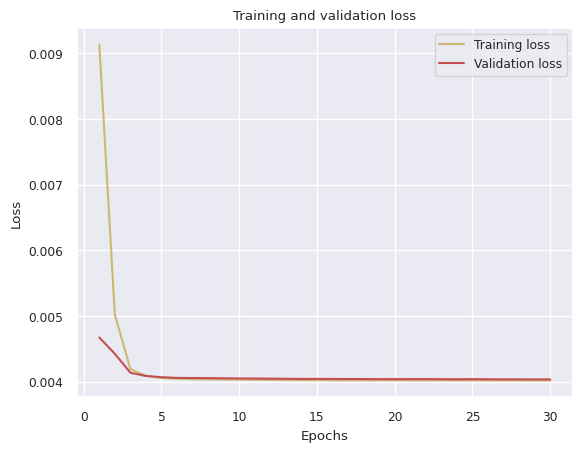

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

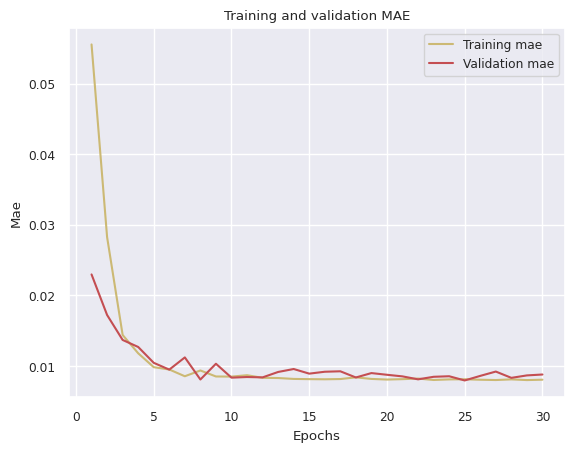

In [82]:
acc =model_history.history['mae']
val_acc =model_history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training mae')
plt.plot(epochs, val_acc, 'r', label='Validation mae')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mae')
plt.legend()
plt.show()

In [84]:
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0040 - mae: 0.0089


[0.0040247393772006035, 0.008737456984817982]

# 2. 자동차평가 데이터 딥러닝 분류

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

df = pd.read_csv("/content/drive/MyDrive/AI_Class/car_evaluation.csv", header = None)
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [86]:
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [87]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [88]:
# 결측치 확인
missing_values = df.isnull().sum()

print("\n결측치 개수:")
print(missing_values)


결측치 개수:
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


In [89]:
# 결측치 제거
df = df.dropna()
missing_values = df.isnull().sum()

print("\n결측치 개수:")
print(missing_values)


결측치 개수:
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


In [90]:
# 모든 컬럼에 대해 LabelEncoder를 적용
for column in df.columns:
    if df[column].dtype == 'object':  # 범주형 컬럼만 변환
        df[column] = label_encoder.fit_transform(df[column])

df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [91]:
# 'class' 열의 개수 확인 (레이블 확인)
class_count = df['class'].value_counts()

# 결과 출력
print("class 개수:")
print(class_count)

class 개수:
class
2    1210
0     384
1      69
3      65
Name: count, dtype: int64


In [92]:
# X와 y 나누기
X = df.drop('class', axis=1).values
y = df['class']

In [93]:
Y = pd.get_dummies(y).values

In [94]:
X

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       ...,
       [1, 1, 3, 2, 0, 1],
       [1, 1, 3, 2, 0, 2],
       [1, 1, 3, 2, 0, 0]])

In [95]:
y

,class
0,2
1,2
2,2
3,2
4,2
...,...
1723,1
1724,3
1725,2
1726,1


In [96]:
Y

array([[False, False,  True, False],
       [False, False,  True, False],
       [False, False,  True, False],
       ...,
       [False, False,  True, False],
       [False,  True, False, False],
       [False, False, False,  True]])

In [97]:
# 데이터 정규화 (평균 0, 표준편차 1로 변환)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [98]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X, Y,test_size=0.2,random_state=0)

In [99]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1382, 6), (346, 6), (1382, 4), (346, 4))

In [100]:

#Defining the model

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(20,input_shape=(6,),activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.compile(Adam(learning_rate=0.04),'binary_crossentropy',metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 20)                  │             140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 4)                   │              84 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,064 (4.16 KB)

 Trainable params: 1,064 (4.16 KB)

 Non-trainable params: 0 (0.00 B)

In [101]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_split=0.1)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6269 - loss: 0.4078 - val_accuracy: 0.7842 - val_loss: 0.2476
Epoch 2/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8095 - loss: 0.2133 - val_accuracy: 0.8345 - val_loss: 0.1452
Epoch 3/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8630 - loss: 0.1484 - val_accuracy: 0.8561 - val_loss: 0.1418
Epoch 4/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8836 - loss: 0.1355 - val_accuracy: 0.8777 - val_loss: 0.1323
Epoch 5/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9035 - loss: 0.1111 - val_accuracy: 0.9353 - val_loss: 0.0987
Epoch 6/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9100 - loss: 0.0976 - val_accuracy: 0.9281 - val_loss: 0.0876
Epoch 7/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9093 - loss: 0.0999 - val_accuracy: 0.9065 - val_loss: 0.1235
Epoch 8/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9376 - loss: 0.0783 - val_accuracy: 0.8705 - val_loss:

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


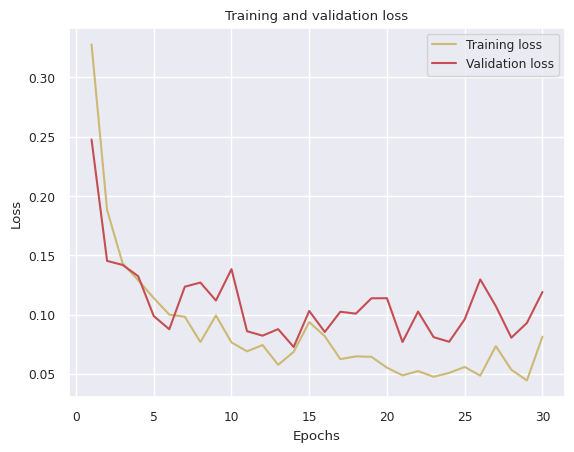

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

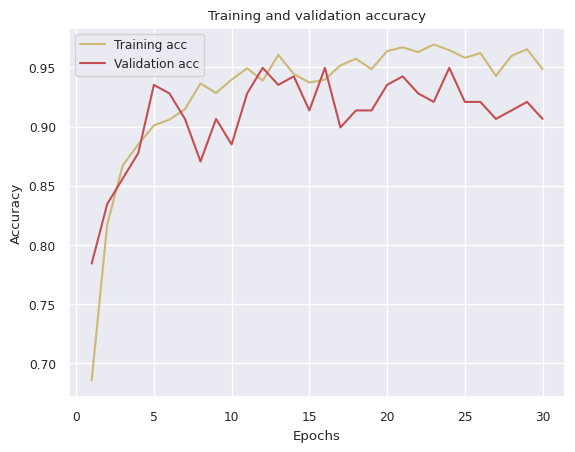

In [103]:

acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [104]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91        79
           1       0.82      0.82      0.82        17
           2       0.97      0.99      0.98       240
           3       0.82      0.90      0.86        10

    accuracy                           0.95       346
   macro avg       0.89      0.90      0.89       346
weighted avg       0.95      0.95      0.95       346

[[ 69   2   7   1]
 [  2  14   0   1]
 [  2   0 238   0]
 [  0   1   0   9]]


In [105]:
model.evaluate(X_test, y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9379 - loss: 0.0813 


[0.07102613151073456, 0.9537572264671326]

# 3. 전복데이터 회귀

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

import requests

url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/abalone.csv"
response = requests.get(url)

with open('abalone.csv', 'wb') as file:
    file.write(response.content)

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

df = pd.read_csv(url, index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [107]:
# 컬렴명 확인
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

Text(0.5, 1.0, 'Rings')

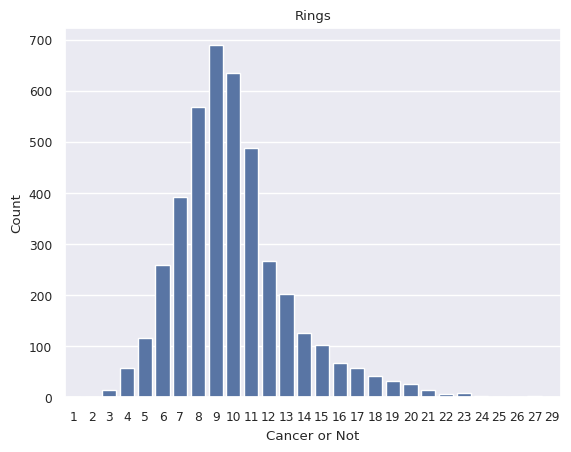

In [108]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Rings")
plt.xlabel("Cancer or Not")
plt.ylabel("Count")
plt.title("Rings")

In [109]:
# 레이블 갯수 확인 (숫자)
df['Rings'].value_counts()

,count
Rings,
9,689
10,634
8,568
11,487
7,391
12,267
6,259
13,203
14,126


In [110]:
# 결측치 확인
missing_values = df.isnull().sum()

print("\n결측치 개수:")
print(missing_values)


결측치 개수:
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64


In [111]:
# 결측치 제거
df = df.dropna()

In [112]:
# 모든 컬럼에 대해 LabelEncoder를 적용
for column in df.columns:
    if df[column].dtype == 'object':  # 범주형 컬럼만 변환
        df[column] = label_encoder.fit_transform(df[column])

df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


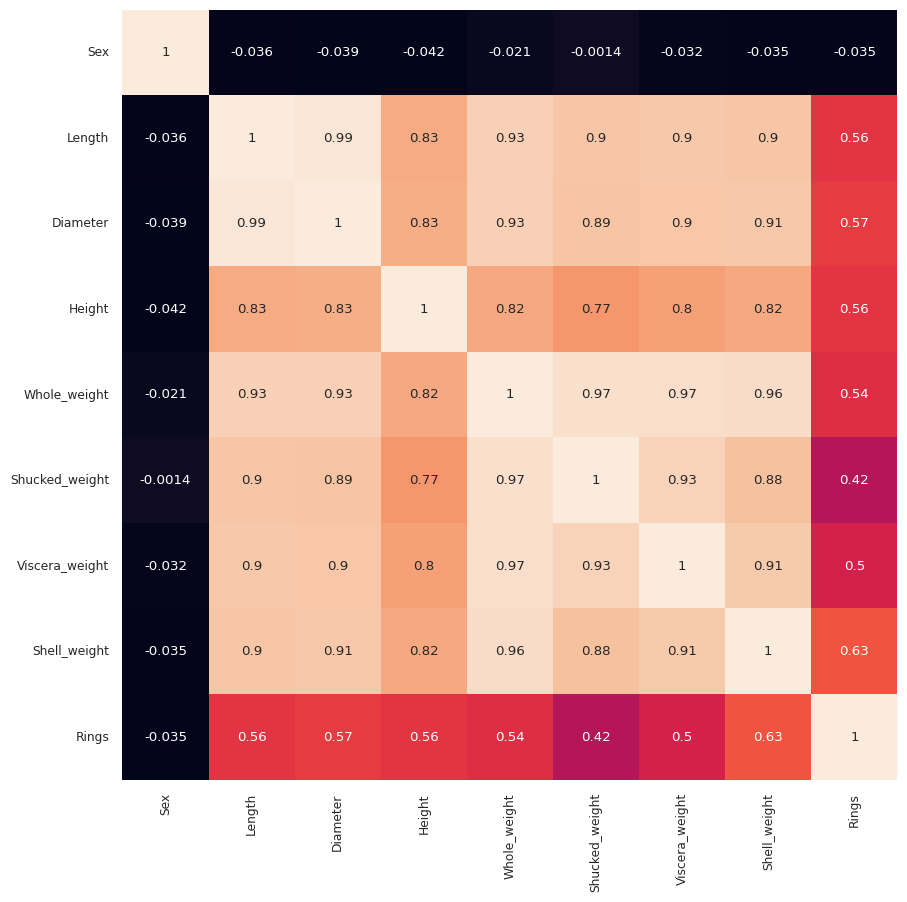

In [113]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# BMI와 높은 건 SkinThickness

In [114]:
X=df.drop('Rings',axis=1)
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [115]:
y=df['Rings']
y.value_counts()

,count
Rings,
9,689
10,634
8,568
11,487
7,391
12,267
6,259
13,203
14,126


In [116]:
y.head()

,Rings
id,
0,15
1,7
2,9
3,10
4,7


In [117]:
Y = pd.get_dummies(y).values

In [118]:
X = X.values

In [119]:
X

array([[2.    , 0.455 , 0.365 , ..., 0.2245, 0.101 , 0.15  ],
       [2.    , 0.35  , 0.265 , ..., 0.0995, 0.0485, 0.07  ],
       [0.    , 0.53  , 0.42  , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [2.    , 0.6   , 0.475 , ..., 0.5255, 0.2875, 0.308 ],
       [0.    , 0.625 , 0.485 , ..., 0.531 , 0.261 , 0.296 ],
       [2.    , 0.71  , 0.555 , ..., 0.9455, 0.3765, 0.495 ]])

In [120]:
y

,Rings
id,
0,15
1,7
2,9
3,10
4,7
...,...
4172,11
4173,10
4174,9


In [121]:
Y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [122]:
# 데이터 정규화 (평균 0, 표준편차 1로 변환)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [123]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X, Y,test_size=0.2,random_state=0)

In [124]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3341, 8), (836, 8), (3341, 28), (836, 28))

In [125]:

#Defining the model

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(20,input_shape=(8,),activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.01),loss='mse',metrics=['mae'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 20)                  │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,041 (4.07 KB)

 Trainable params: 1,041 (4.07 KB)

 Non-trainable params: 0 (0.00 B)

In [126]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_split=0.1)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0416 - mae: 0.0924 - val_loss: 0.0345 - val_mae: 0.0680
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0345 - mae: 0.0688 - val_loss: 0.0345 - val_mae: 0.0689
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0344 - mae: 0.0688 - val_loss: 0.0344 - val_mae: 0.0687
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0344 - mae: 0.0689 - val_loss: 0.0344 - val_mae: 0.0680
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0344 - mae: 0.0688 - val_loss: 0.0344 - val_mae: 0.0700
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0344 - mae: 0.0689 - val_loss: 0.0344 - val_mae: 0.0699
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0344 - mae: 0.0689 - val_loss: 0.0344 - val_mae: 0.0689
Epoch 8/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0344 - mae: 0.0688 - val_loss: 0.0344 - val_mae: 0.0689
Epoch 9/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0344 - mae: 

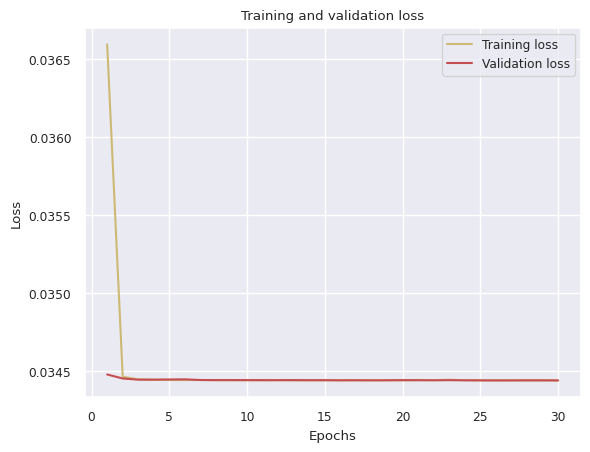

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

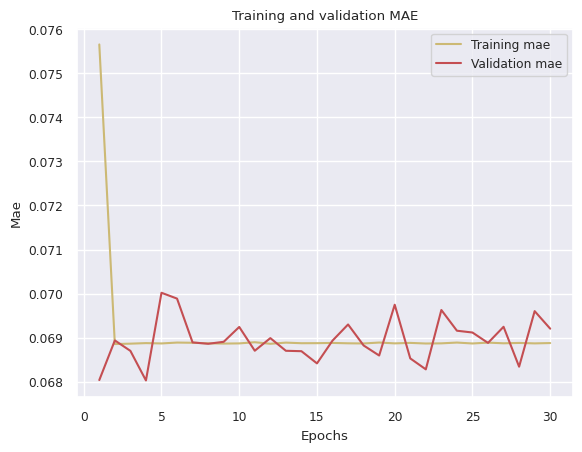

In [128]:
acc =model_history.history['mae']
val_acc =model_history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training mae')
plt.plot(epochs, val_acc, 'r', label='Validation mae')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mae')
plt.legend()
plt.show()

In [130]:
model.evaluate(X_test, y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0344 - mae: 0.0692 


[0.03443906083703041, 0.06915388256311417]